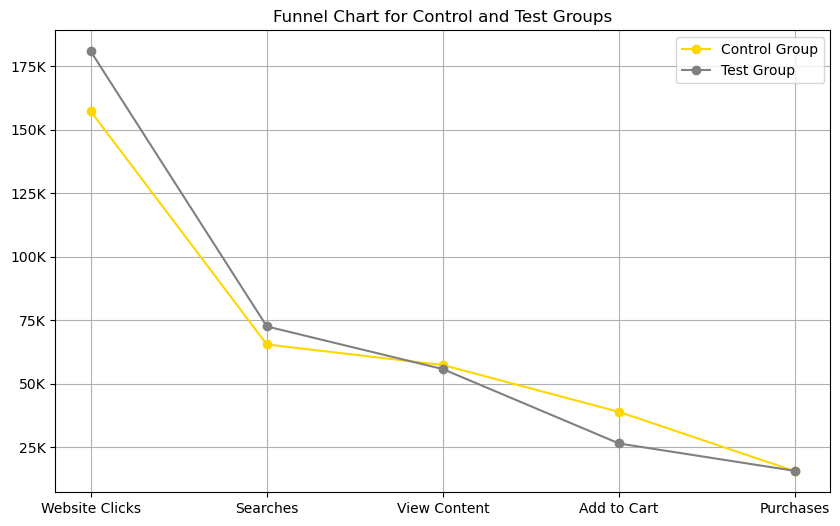

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the provided CSV files
control_group_path = 'control_group_filled_updated.csv'
test_group_path = 'test_group_filled_updated.csv'

control_group_df = pd.read_csv(control_group_path)
test_group_df = pd.read_csv(test_group_path)

# Aggregating data for each stage
control_group_totals = {
    'Website Clicks': control_group_df['# of Website Clicks'].sum(),
    'Searches': control_group_df['# of Searches'].sum(),
    'View Content': control_group_df['# of View Content'].sum(),
    'Add to Cart': control_group_df['# of Add to Cart'].sum(),
    'Purchases': control_group_df['# of Purchase'].sum()
}

test_group_totals = {
    'Website Clicks': test_group_df['# of Website Clicks'].sum(),
    'Searches': test_group_df['# of Searches'].sum(),
    'View Content': test_group_df['# of View Content'].sum(),
    'Add to Cart': test_group_df['# of Add to Cart'].sum(),
    'Purchases': test_group_df['# of Purchase'].sum()
}

# Create the line chart
stages = list(control_group_totals.keys())
control_values = list(control_group_totals.values())
test_values = list(test_group_totals.values())

plt.figure(figsize=(10, 6))
plt.plot(stages, control_values, marker='o', label='Control Group', color='#FFD700')
plt.plot(stages, test_values, marker='o', label='Test Group', color='#808080')

plt.title('Funnel Chart for Control and Test Groups')
plt.legend()
plt.grid(True)

# Format y-axis to show values in 'K'
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x*1e-3)))

plt.show()

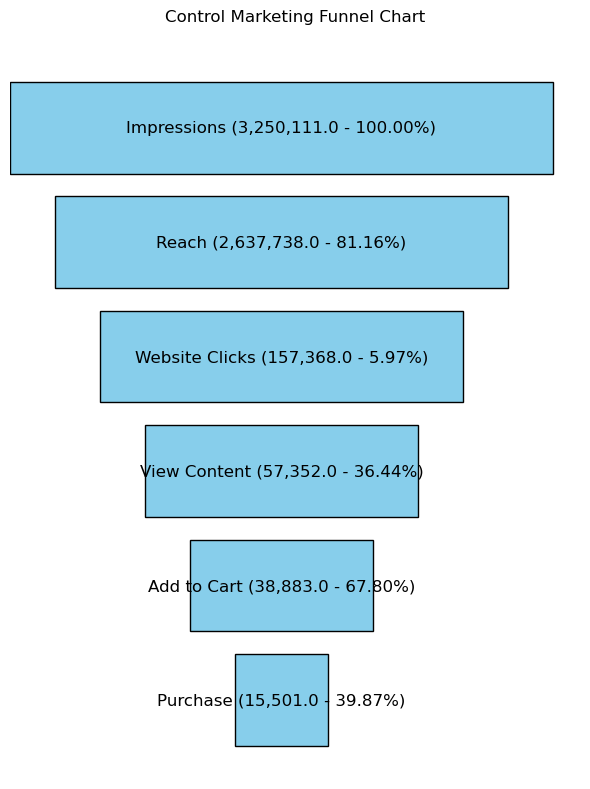

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to create an inverted pyramid funnel chart with percentages and counts sorted from big to small
def create_sorted_inverted_pyramid_funnel_with_percentages_counts(stages, counts):
    # Combine stages and counts into a dataframe for sorting
    funnel_df = pd.DataFrame({
        "Stage": stages,
        "Count": counts
    })

    # Calculate percentages relative to the previous stage
    funnel_df["Percentage"] = funnel_df["Count"] / funnel_df["Count"].shift(1).fillna(funnel_df["Count"].max()) * 100

    fig, ax = plt.subplots(figsize=(6, 8))
    levels = len(stages)
    max_count = max(counts)
    min_count = min(counts)
    width_factor = max_count / levels

    for i in range(levels):
        width = min_count + (width_factor * (levels - i))
        left = (max_count - width) / 2
        stage = funnel_df.iloc[i]["Stage"]
        count = funnel_df.iloc[i]["Count"]
        percentage = funnel_df.iloc[i]["Percentage"]
        ax.barh(y=[i], width=width, left=left, height=0.8, color='skyblue', edgecolor='black')
        ax.text(max_count / 2, i, f"{stage} ({count:,} - {percentage:.2f}%)", va='center', ha='center', color='black', fontsize=12)

    ax.invert_yaxis()  # Reverse the order to display the funnel from top to bottom
    ax.axis('off')  # Turn off the axis
    ax.set_title('Control Marketing Funnel Chart', pad=20)
    plt.tight_layout()
    plt.show()

# Sample data
stages = ["Impressions", "Reach", "Website Clicks", "View Content", "Add to Cart", "Purchase"]
counts = [3250111.0, 2637738.0, 157368.0, 57352.0, 38883.0, 15501.0]

# Create the chart
create_sorted_inverted_pyramid_funnel_with_percentages_counts(stages, counts)

In [31]:
control_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Campaign Name                    30 non-null     object 
 1   Date                             30 non-null     object 
 2   Spend                            30 non-null     int64  
 3   # of Impressions                 30 non-null     float64
 4   Reach                            30 non-null     float64
 5   # of Website Clicks              30 non-null     float64
 6   # of Searches                    30 non-null     float64
 7   # of View Content                30 non-null     float64
 8   # of Add to Cart                 30 non-null     float64
 9   # of Purchase                    30 non-null     float64
 10  Purchase/View_Content            30 non-null     float64
 11  Impressions/Reach                30 non-null     float64
 12  Website_Clicks/Impressio

C:\Users\Dell\AppData\Local\Temp\ipykernel_6548\1135998158.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel_df["Percentage"].iloc[0] = 100
C:\Users\Dell\AppData\Local\Temp\ipykernel_6548\1135998158.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel_df["Percentage"].iloc[0] = 100


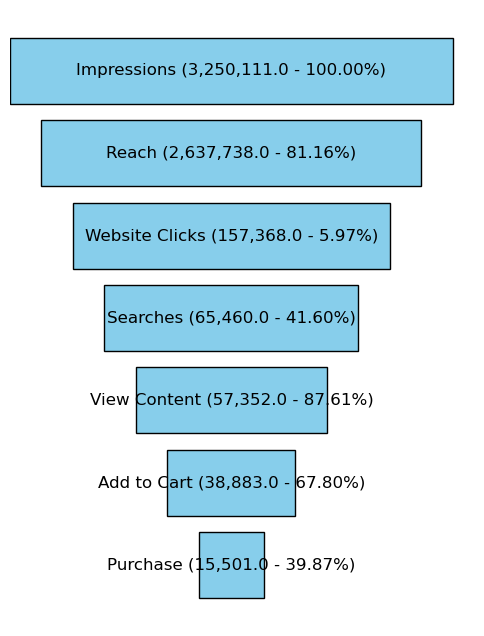

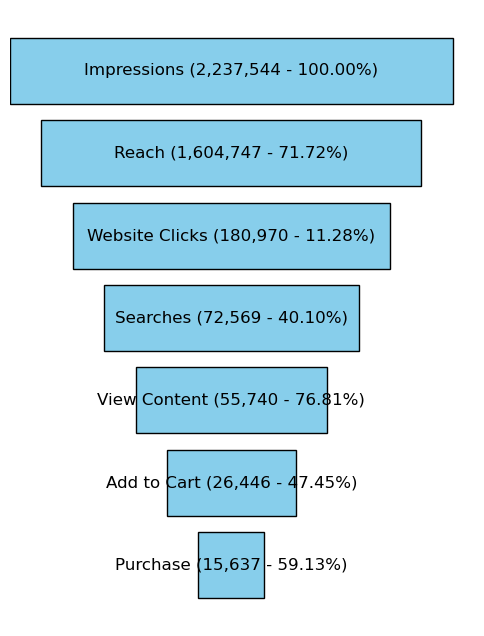

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to create an inverted pyramid funnel chart with percentages and counts sorted from big to small
def create_sorted_inverted_pyramid_funnel_with_percentages_counts(df, colnames, stages):
    # Calculate counts for each stage based on non-null entries in the specified columns
    counts = [df[colname].sum() for colname in colnames]

    # Combine stages and counts into a dataframe
    funnel_df = pd.DataFrame({
        "Stage": stages,
        "Count": counts
    })
    
    # Calculate percentages
    funnel_df["Percentage"] = funnel_df["Count"] / funnel_df["Count"].shift(1) * 100

    # Set the first row to 100% since there's no previous row to compare
    funnel_df["Percentage"].iloc[0] = 100

    fig, ax = plt.subplots(figsize=(6, 8))
    levels = len(stages)
    max_count = max(funnel_df["Count"])
    min_count = min(funnel_df["Count"])
    width_factor = max_count / levels

    for i in range(levels):
        width = min_count + (width_factor * (levels - i))
        left = (max_count - width) / 2
        stage = funnel_df.iloc[i]["Stage"]
        count = funnel_df.iloc[i]["Count"]
        percentage = funnel_df.iloc[i]["Percentage"]
        ax.barh(y=[i], width=width, left=left, height=0.8, color='skyblue', edgecolor='black')
        ax.text(max_count / 2, i, f"{stage} ({count:,} - {percentage:.2f}%)", va='center', ha='center', color='black', fontsize=12)

    ax.invert_yaxis()  # Reverse the order to display the funnel from top to bottom
    ax.axis('off')  # Turn off the axis


# Define the stages
stages = ["Impressions", "Reach", "Website Clicks", "Searches", "View Content", "Add to Cart", "Purchase"]

# Define the column names
colnames = ['# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

# Create the chart for the dataset
create_sorted_inverted_pyramid_funnel_with_percentages_counts(control_group_df, colnames, stages)
ax.set_title('Control Group Funnel Chart', pad=20)

create_sorted_inverted_pyramid_funnel_with_percentages_counts(test_group_df, colnames, stages)
ax.set_title('Test Group Funnel Chart', pad=20)

plt.show()

In [33]:
control_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Campaign Name                    30 non-null     object 
 1   Date                             30 non-null     object 
 2   Spend                            30 non-null     int64  
 3   # of Impressions                 30 non-null     float64
 4   Reach                            30 non-null     float64
 5   # of Website Clicks              30 non-null     float64
 6   # of Searches                    30 non-null     float64
 7   # of View Content                30 non-null     float64
 8   # of Add to Cart                 30 non-null     float64
 9   # of Purchase                    30 non-null     float64
 10  Purchase/View_Content            30 non-null     float64
 11  Impressions/Reach                30 non-null     float64
 12  Website_Clicks/Impressio

In [34]:
control_group_df['# of Purchase / # of Add to Cart'] = control_group_df['# of Purchase'] / control_group_df['# of Purchase']
test_group_df['# of Purchase / # of Add to Cart'] = test_group_df['# of Purchase'] / test_group_df['# of Purchase']

In [35]:
control_group_df['Date'] = pd.to_datetime(control_group_df['Date'])
test_group_df['Date'] = pd.to_datetime(test_group_df['Date'])

In [36]:
control_group_df['Weekday'] = control_group_df['Date'].dt.day_name()
test_group_df['Weekday'] = test_group_df['Date'].dt.day_name()

In [37]:
control_group_df.head()

,Campaign Name,Date,Spend,# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Purchase/View_Content,Impressions/Reach,Website_Clicks/Impressions,Spend/Purchase,Spend/# of Impressions,Spend/# of Website Clicks,Add to Cart/# of Website Clicks,Engagement Rate,# of Purchase / # of Add to Cart,Weekday
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.29,1.45,0.08,3.69,0.03,0.32,0.26,20.14,1.0,Thursday
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.28,1.18,0.07,3.44,0.01,0.22,0.15,11.69,1.0,Friday
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.24,1.19,0.05,6.30,0.02,0.36,0.17,8.83,1.0,Saturday
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.35,1.19,0.04,5.71,0.03,0.63,0.39,8.31,1.0,Sunday
4,Control Campaign,2019-08-05,1835,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.35,1.19,0.04,5.40,0.03,0.60,0.39,8.31,1.0,Monday


In [38]:
sum(test_group_df['# of Purchase'])

15637

In [39]:
control_group_df.groupby('Weekday').sum('# of Purchase')[['# of Purchase']]

,# of Purchase
Weekday,
Friday,2886.0
Monday,1927.0
Saturday,1913.0
Sunday,1444.0
Thursday,2167.0
Tuesday,2434.0
Wednesday,2730.0


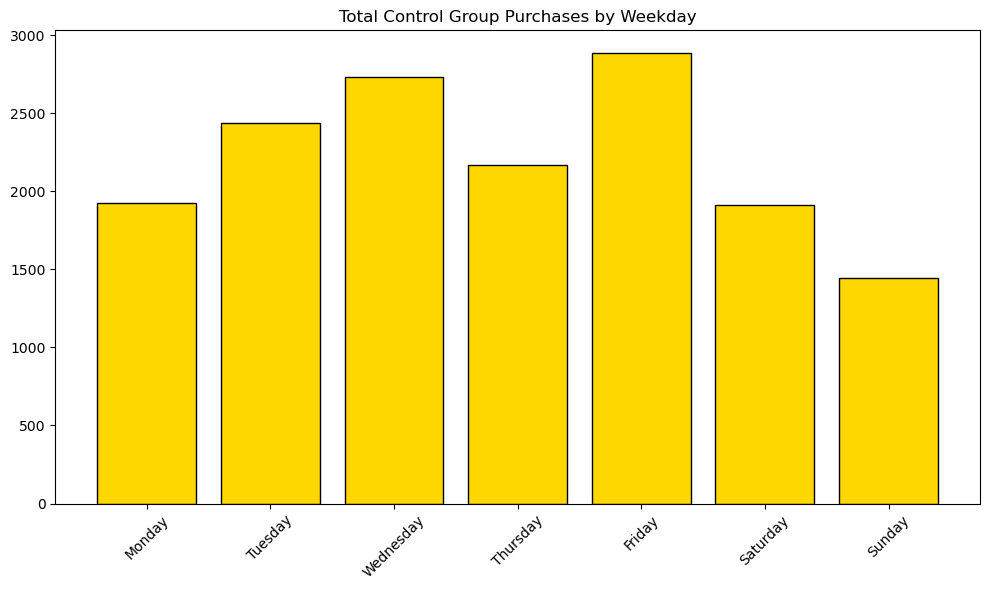

In [47]:
# Group by 'Weekday' and sum '# of Purchase'
grouped_data = control_group_df.groupby('Weekday')['# of Purchase'].sum().reset_index()

# Sort the weekdays to ensure the correct order
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data['Weekday'] = pd.Categorical(grouped_data['Weekday'], categories=ordered_weekdays, ordered=True)
grouped_data = grouped_data.sort_values('Weekday')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Weekday'], grouped_data['# of Purchase'], color='#FFD700', edgecolor='black')
plt.title('Total Control Group Purchases by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

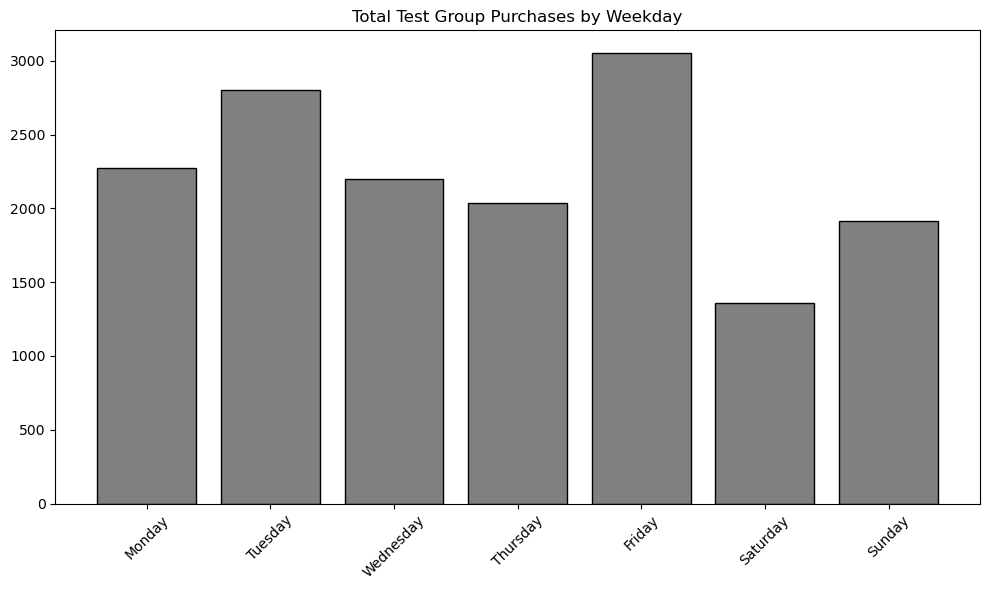

In [48]:
# Group by 'Weekday' and sum '# of Purchase'
grouped_data = test_group_df.groupby('Weekday')['# of Purchase'].sum().reset_index()

# Sort the weekdays to ensure the correct order
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data['Weekday'] = pd.Categorical(grouped_data['Weekday'], categories=ordered_weekdays, ordered=True)
grouped_data = grouped_data.sort_values('Weekday')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Weekday'], grouped_data['# of Purchase'], color='#808080', edgecolor='black')
plt.title('Total Test Group Purchases by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

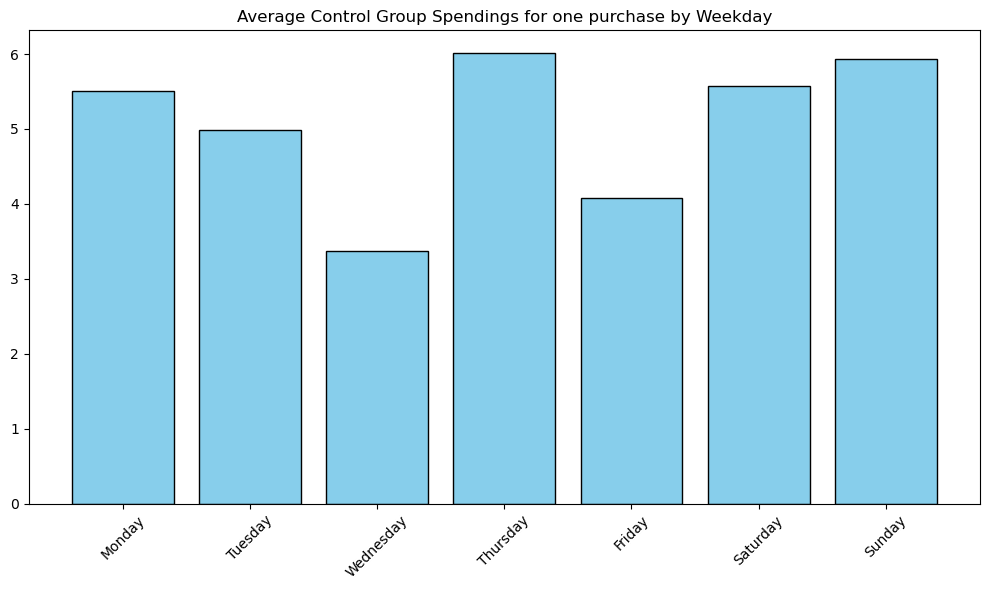

In [42]:
# Group by 'Weekday' and sum '# of Purchase'
grouped_data = control_group_df.groupby('Weekday')['Spend/Purchase'].mean().reset_index()

# Sort the weekdays to ensure the correct order
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data['Weekday'] = pd.Categorical(grouped_data['Weekday'], categories=ordered_weekdays, ordered=True)
grouped_data = grouped_data.sort_values('Weekday')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Weekday'], grouped_data['Spend/Purchase'], color='skyblue', edgecolor='black')
plt.title('Average Control Group Spendings for one purchase by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

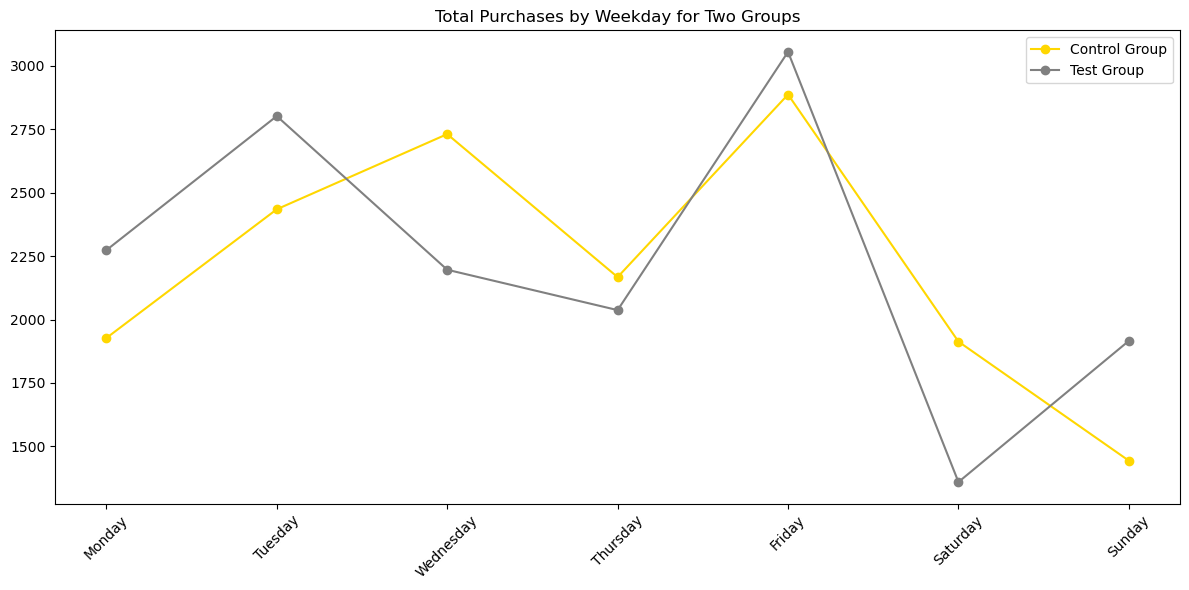

In [43]:
# Group by 'Weekday' and sum '# of Purchase'
grouped_data1 = control_group_df.groupby('Weekday')['# of Purchase'].sum().reset_index()
grouped_data2 = test_group_df.groupby('Weekday')['# of Purchase'].sum().reset_index()

# Sort the weekdays to ensure the correct order
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data1['Weekday'] = pd.Categorical(grouped_data1['Weekday'], categories=ordered_weekdays, ordered=True)
grouped_data1 = grouped_data1.sort_values('Weekday')

grouped_data2['Weekday'] = pd.Categorical(grouped_data2['Weekday'], categories=ordered_weekdays, ordered=True)
grouped_data2 = grouped_data2.sort_values('Weekday')

# Plotting
plt.figure(figsize=(12, 6))

# Line chart for graph 1
plt.plot(grouped_data1['Weekday'], grouped_data1['# of Purchase'], marker='o', label='Control Group', color='#FFD700')

# Line chart for graph 2
plt.plot(grouped_data2['Weekday'], grouped_data2['# of Purchase'], marker='o', label='Test Group', color='#808080')

plt.title('Total Purchases by Weekday for Two Groups')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

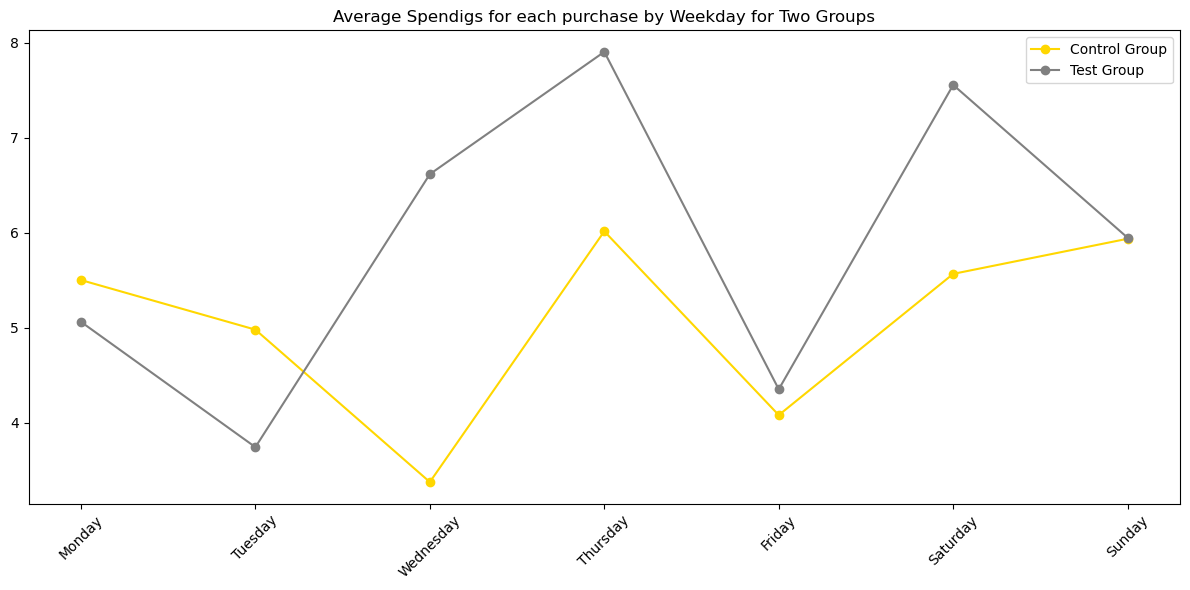

In [45]:
# Group by 'Weekday' and sum '# of Purchase'
grouped_data1 = control_group_df.groupby('Weekday')['Spend/Purchase'].mean().reset_index()
grouped_data2 = test_group_df.groupby('Weekday')['Spend/Purchase'].mean().reset_index()

# Sort the weekdays to ensure the correct order
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data1['Weekday'] = pd.Categorical(grouped_data1['Weekday'], categories=ordered_weekdays, ordered=True)
grouped_data1 = grouped_data1.sort_values('Weekday')

grouped_data2['Weekday'] = pd.Categorical(grouped_data2['Weekday'], categories=ordered_weekdays, ordered=True)
grouped_data2 = grouped_data2.sort_values('Weekday')

# Plotting
plt.figure(figsize=(12, 6))

# Line chart for graph 1
plt.plot(grouped_data1['Weekday'], grouped_data1['Spend/Purchase'], marker='o', label='Control Group', color='#FFD700')

# Line chart for graph 2
plt.plot(grouped_data2['Weekday'], grouped_data2['Spend/Purchase'], marker='o', label='Test Group', color='#808080')

plt.title('Average Spendigs for each purchase by Weekday for Two Groups')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
control_group_df.columns

Index(['Campaign Name', 'Date', 'Spend', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase', 'Purchase/View_Content',
       'Impressions/Reach', 'Website_Clicks/Impressions', 'Spend/Purchase',
       'Spend/# of Impressions', 'Spend/# of Website Clicks',
       'Add to Cart/# of Website Clicks', 'Engagement Rate',
       '# of Purchase / # of Add to Cart', 'Weekday'],
      dtype='object')

In [18]:
test_group_df.columns

Index(['Campaign Name', 'Date', 'Spend', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase', 'Purchase/View_Content',
       'Impressions/Reach', 'Website_Clicks/Impressions', 'Spend/Purchase',
       'Spend/# of Impressions', 'Spend/# of Website Clicks',
       'Add to Cart/# of Website Clicks', 'Engagement Rate',
       '# of Purchase / # of Add to Cart', 'Weekday'],
      dtype='object')

In [19]:
control_group_df[['Purchase/View_Content',
       'Impressions/Reach', 'Website_Clicks/Impressions', 'Spend/Purchase',
       'Spend/# of Impressions', 'Spend/# of Website Clicks',
       'Add to Cart/# of Website Clicks', 'Engagement Rate',
       '# of Purchase / # of Add to Cart']].mean()

Purchase/View_Content                0.316000
Impressions/Reach                    1.251333
Website_Clicks/Impressions           0.050667
Spend/Purchase                       5.064333
Spend/# of Impressions               0.022333
Spend/# of Website Clicks            0.498333
Add to Cart/# of Website Clicks      0.281667
Engagement Rate                     11.441667
# of Purchase / # of Add to Cart     1.000000
dtype: float64

In [22]:
test_group_df[['Purchase/View_Content',
       'Impressions/Reach', 'Website_Clicks/Impressions', 'Spend/Purchase',
       'Spend/# of Impressions', 'Spend/# of Website Clicks',
       'Add to Cart/# of Website Clicks', 'Engagement Rate',
       '# of Purchase / # of Add to Cart']].mean()

Purchase/View_Content                0.306000
Impressions/Reach                    1.766667
Website_Clicks/Impressions           0.102333
Spend/Purchase                       5.900000
Spend/# of Impressions               0.043333
Spend/# of Website Clicks            0.468333
Add to Cart/# of Website Clicks      0.157667
Engagement Rate                     29.128333
# of Purchase / # of Add to Cart     1.000000
dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_6548\1693596849.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel_df["Percentage"].iloc[0] = 100
C:\Users\Dell\AppData\Local\Temp\ipykernel_6548\1693596849.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(color_gradient, levels)(np.linspace(0, 1, levels))
C:\Users\Dell\AppData\Local\Temp\ipykernel_6548\1693596849.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fun

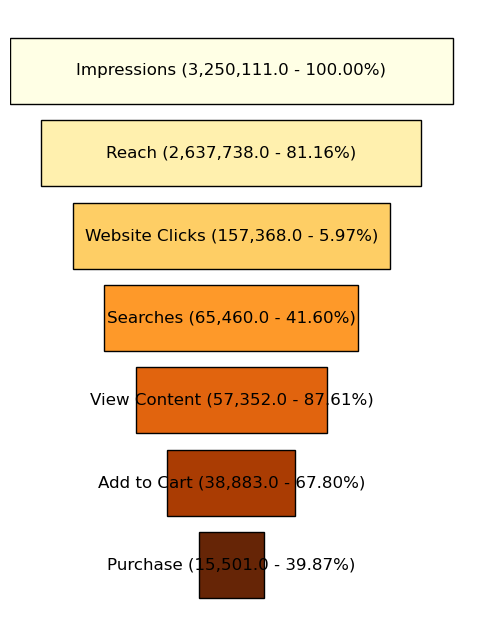

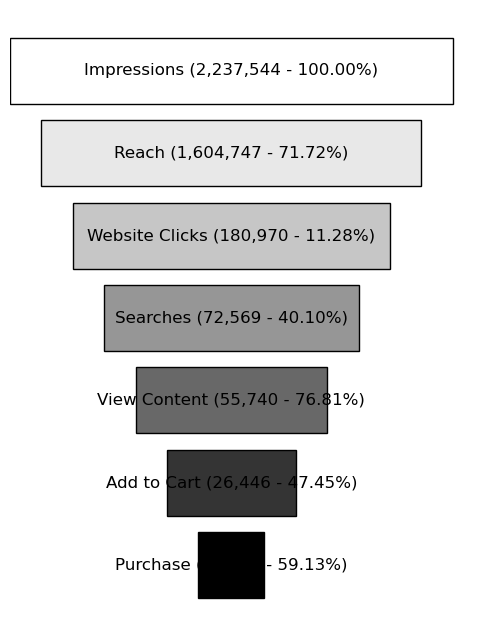

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to create an inverted pyramid funnel chart with percentages and counts sorted from big to small
def create_sorted_inverted_pyramid_funnel_with_percentages_counts(df, colnames, stages, color_gradient):
    # Calculate counts for each stage based on non-null entries in the specified columns
    counts = [df[colname].sum() for colname in colnames]

    # Combine stages and counts into a dataframe
    funnel_df = pd.DataFrame({
        "Stage": stages,
        "Count": counts
    })
    
    # Calculate percentages
    funnel_df["Percentage"] = funnel_df["Count"] / funnel_df["Count"].shift(1) * 100

    # Set the first row to 100% since there's no previous row to compare
    funnel_df["Percentage"].iloc[0] = 100

    fig, ax = plt.subplots(figsize=(6, 8))
    levels = len(stages)
    max_count = max(funnel_df["Count"])
    min_count = min(funnel_df["Count"])
    width_factor = max_count / levels

    # Generate the gradient color list
    colors = plt.cm.get_cmap(color_gradient, levels)(np.linspace(0, 1, levels))

    for i in range(levels):
        width = min_count + (width_factor * (levels - i))
        left = (max_count - width) / 2
        stage = funnel_df.iloc[i]["Stage"]
        count = funnel_df.iloc[i]["Count"]
        percentage = funnel_df.iloc[i]["Percentage"]
        ax.barh(y=[i], width=width, left=left, height=0.8, color=colors[i], edgecolor='black')
        ax.text(max_count / 2, i, f"{stage} ({count:,} - {percentage:.2f}%)", va='center', ha='center', color='black', fontsize=12)

    ax.invert_yaxis()  # Reverse the order to display the funnel from top to bottom
    ax.axis('off')  # Turn off the axis

# Define the stages
stages = ["Impressions", "Reach", "Website Clicks", "Searches", "View Content", "Add to Cart", "Purchase"]

# Define the column names
colnames = ['# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

# Create the chart for the Control Group dataset with yellow gradient
create_sorted_inverted_pyramid_funnel_with_percentages_counts(control_group_df, colnames, stages, 'YlOrBr')
ax.set_title('Control Group Funnel Chart', pad=20)

# Create the chart for the Test Group dataset with grey gradient
create_sorted_inverted_pyramid_funnel_with_percentages_counts(test_group_df, colnames, stages, 'Greys')
ax.set_title('Test Group Funnel Chart', pad=20)

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6548\4208726877.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel_df["Percentage"].iloc[0] = 100


IndexError: list index out of range

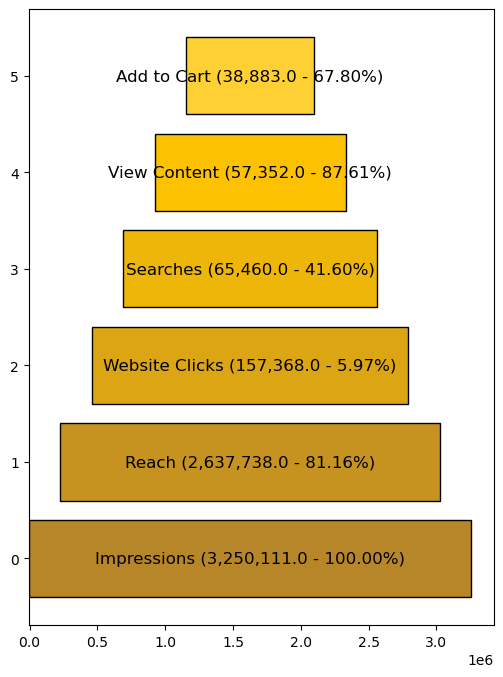

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to create an inverted pyramid funnel chart with percentages and counts sorted from big to small
def create_sorted_inverted_pyramid_funnel_with_percentages_counts(df, colnames, stages, colors):
    # Calculate counts for each stage based on non-null entries in the specified columns
    counts = [df[colname].sum() for colname in colnames]

    # Combine stages and counts into a dataframe
    funnel_df = pd.DataFrame({
        "Stage": stages,
        "Count": counts
    })
    
    # Calculate percentages
    funnel_df["Percentage"] = funnel_df["Count"] / funnel_df["Count"].shift(1) * 100

    # Set the first row to 100% since there's no previous row to compare
    funnel_df["Percentage"].iloc[0] = 100

    fig, ax = plt.subplots(figsize=(6, 8))
    levels = len(stages)
    max_count = max(funnel_df["Count"])
    min_count = min(funnel_df["Count"])
    width_factor = max_count / levels

    for i in range(levels):
        width = min_count + (width_factor * (levels - i))
        left = (max_count - width) / 2
        stage = funnel_df.iloc[i]["Stage"]
        count = funnel_df.iloc[i]["Count"]
        percentage = funnel_df.iloc[i]["Percentage"]
        ax.barh(y=[i], width=width, left=left, height=0.8, color=colors[i], edgecolor='black')
        ax.text(max_count / 2, i, f"{stage} ({count:,} - {percentage:.2f}%)", va='center', ha='center', color='black', fontsize=12)

    ax.invert_yaxis()  # Reverse the order to display the funnel from top to bottom
    ax.axis('off')  # Turn off the axis

# Define the stages
stages = ["Impressions", "Reach", "Website Clicks", "Searches", "View Content", "Add to Cart", "Purchase"]

# Define the column names
colnames = ['# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

# Yellow gradient colors
yellow_gradient = ['#B78628', '#C69320', '#DBA514', '#EEB609', '#FCC201', '#FFD033']

# Grey gradient colors using a similar range
grey_gradient = ['#4D4D4D', '#696969', '#808080', '#A9A9A9', '#C0C0C0', '#D3D3D3']

# Create the chart for the Control Group dataset with yellow gradient
create_sorted_inverted_pyramid_funnel_with_percentages_counts(control_group_df, colnames, stages, yellow_gradient)
plt.title('Control Group Funnel Chart', pad=20)

# Create the chart for the Test Group dataset with grey gradient
create_sorted_inverted_pyramid_funnel_with_percentages_counts(test_group_df, colnames, stages, grey_gradient)
plt.title('Test Group Funnel Chart', pad=20)

plt.show()